In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re
import pickle

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
print("Original DataFrame Shape:", df.shape)
print("\nOriginal Category Distribution:")
print(df['Category'].value_counts())

Original DataFrame Shape: (962, 2)

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


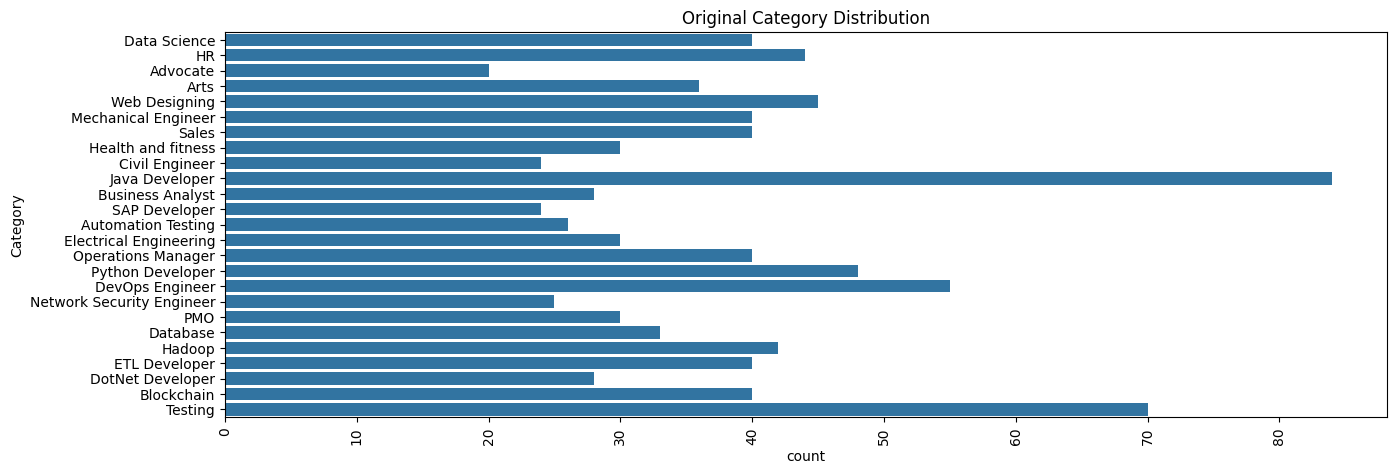

In [4]:
plt.figure(figsize=(15, 5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.title('Original Category Distribution')
plt.show()

In [5]:
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the 'Category' column to learn the unique categories
le.fit(df['Category'])

# Now, transform the 'Category' column using the fitted encoder
df['Category'] = le.transform(df['Category'])

# Verify the transformation
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [18]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(df[['Resume']], df['Category'])
df_balanced = pd.DataFrame(X_res, columns=['Resume'])
df_balanced['Category'] = y_res

print("\nBalanced DataFrame Shape:", df_balanced.shape)
print("\nBalanced Category Distribution (After Oversampling):")
print(df_balanced['Category'].value_counts())


Balanced DataFrame Shape: (2100, 2)

Balanced Category Distribution (After Oversampling):
Category
6     84
12    84
0     84
1     84
24    84
16    84
22    84
14    84
5     84
15    84
4     84
21    84
2     84
11    84
18    84
20    84
8     84
17    84
19    84
7     84
13    84
10    84
9     84
3     84
23    84
Name: count, dtype: int64


In [19]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000) # Limiting features to 5000
requredText = tfidf.fit_transform(df_balanced['Resume'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(requredText, df_balanced['Category'], test_size=0.2, random_state=42, stratify=df_balanced['Category'])

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (1680, 5000)
Testing set shape: (420, 5000)


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
import xgboost as xgb

In [22]:
pip install lightgbm xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Sriparna Koar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Multinomial Naive Bayes': MultinomialNB(),
    'LightGBM': lgb.LGBMClassifier(random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, random_state=42, n_jobs=-1)
}


In [24]:
for name, classifier in classifiers.items():
    print(f"\n--- Training {name} ---")
    
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.inverse_transform(np.arange(len(le.classes_))))
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")

# Example of Hyperparameter Tuning with GridSearchCV on a single model (Random Forest)
print("\n--- Hyperparameter Tuning with GridSearchCV for Random Forest ---")



--- Training Logistic Regression ---
Accuracy: 0.9976
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        16
                     Arts       1.00      1.00      1.00        17
       Automation Testing       1.00      1.00      1.00        17
               Blockchain       1.00      1.00      1.00        17
         Business Analyst       1.00      1.00      1.00        17
           Civil Engineer       1.00      1.00      1.00        17
             Data Science       1.00      1.00      1.00        17
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      0.94      0.97        16
         DotNet Developer       1.00      1.00      1.00        17
            ETL Developer       1.00      1.00      1.00        17
   Electrical Engineering       1.00      1.00      1.00        16
                       HR       1.00      1.00    

c:\Users\Sriparna Koar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sriparna Koar\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [00:12:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 1.0000
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        16
                     Arts       1.00      1.00      1.00        17
       Automation Testing       1.00      1.00      1.00        17
               Blockchain       1.00      1.00      1.00        17
         Business Analyst       1.00      1.00      1.00        17
           Civil Engineer       1.00      1.00      1.00        17
             Data Science       1.00      1.00      1.00        17
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      1.00      1.00        16
         DotNet Developer       1.00      1.00      1.00        17
            ETL Developer       1.00      1.00      1.00        17
   Electrical Engineering       1.00      1.00      1.00        16
                       HR       1.00      1.00      1.00        17
                   Ha

In [25]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}


In [26]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9982


In [27]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
report_best_rf = classification_report(y_test, y_pred_best_rf, target_names=le.inverse_transform(np.arange(len(le.classes_))))

print(f"\nRandom Forest (Tuned) Test Accuracy: {accuracy_best_rf:.4f}")
print(f"Random Forest (Tuned) Classification Report:\n{report_best_rf}")



Random Forest (Tuned) Test Accuracy: 0.9976
Random Forest (Tuned) Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        16
                     Arts       1.00      1.00      1.00        17
       Automation Testing       1.00      1.00      1.00        17
               Blockchain       1.00      1.00      1.00        17
         Business Analyst       1.00      1.00      1.00        17
           Civil Engineer       1.00      1.00      1.00        17
             Data Science       1.00      1.00      1.00        17
                 Database       1.00      1.00      1.00        17
          DevOps Engineer       1.00      0.94      0.97        16
         DotNet Developer       1.00      1.00      1.00        17
            ETL Developer       1.00      1.00      1.00        17
   Electrical Engineering       1.00      1.00      1.00        16
                       HR       1.00  

In [32]:
best_model = best_rf_model  # Or choose another top-performing model
pickle.dump(tfidf, open('tfidf_advanced.pkl', 'wb'))
pickle.dump(best_model, open('clf_advanced.pkl', 'wb'))
pickle.dump(le, open('encoder_advanced.pkl', 'wb'))

In [33]:
import pickle
import re

# Load the saved model and other necessary objects
try:
    tfidf = pickle.load(open('tfidf_advanced.pkl', 'rb'))
    model = pickle.load(open('clf_advanced.pkl', 'rb')) # Using the advanced classifier
    le = pickle.load(open('encoder_advanced.pkl', 'rb'))
except FileNotFoundError:
    print("Error: The necessary model and data files were not found. Please ensure 'tfidf_advanced.pkl', 'clf_advanced.pkl', and 'encoder_advanced.pkl' are in the same directory.")

In [38]:
def cleanResume(txt):
    """
    This function cleans the resume text by removing URLs, hashtags, mentions, 
    special characters, and extra spaces.
    """
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

# Example resume text for prediction
input_resume = """
Highly motivated and results-driven professional with a decade of experience in strategic planning and operational leadership. Known for expertly guiding complex projects from inception to completion, she has a proven record of optimizing workflows, reducing costs, and enhancing organizational efficiency across various teams and departments. Sarah excels at building strong, collaborative relationships and leveraging data to inform critical business decisions.

She holds a Master of Science in Business Administration and a certification in project management. Her passion lies in fostering a positive and productive work environment by implementing best practices and innovative solutions. She is recognized for her exceptional problem-solving skills, meticulous attention to detail, and unwavering commitment to ethical leadership.

Key Skills:

Project and Program Management

Budgeting and Resource Allocation

Strategic Planning and Execution

Data Analysis and Performance Metrics

Operational Optimization

Risk Management

Team Leadership and Development

Stakeholder Communication

Business Process Improvement

Change Management

Certifications and Licenses:

Certified Project Management Professional (PMP)

Agile Certified Practitioner (ACP)

Education:

Master of Science in Business Administration, XYZ University, 2010-2013

Professional Experience:

Senior Operations Manager at ABC Consulting (2016-Present)

Business Analyst at DEF Global Solutions (2013-2016)

Languages:

English (Fluent)

Spanish (Conversational)
"""

# Clean the resume text
cleaned_text = cleanResume(input_resume)

# Vectorize the cleaned text using the loaded TF-IDF vectorizer
vectorized_text = tfidf.transform([cleaned_text])

In [39]:
# Make a prediction using the trained model
predicted_category = model.predict(vectorized_text)

# Transform the numerical prediction back to the original category name
predicted_category_name = le.inverse_transform(predicted_category)

# Print the final result
print(f"The predicted category for the resume is: {predicted_category_name[0]}")

The predicted category for the resume is: Business Analyst
